# 2. EDA

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Pseudo-Lab/Tutorial-Book-en/blob/master/book/chapters/en/object-detection/Ch2-EDA.ipynb)

In the previous chapter, we briefly reviewed object detection as a whole. From this chapter, we will begin performing object detection in earnest. The most important part of improving the performance of a deep learning model is the dataset, although the model itself is also important. Data scientists say they spend more than 90% of their time on data curation when it comes to training deep learning models. Data cleansing is essential to avoid biased, misleading or distorted training results. It is important to use the correct dataset to facilitate data cleansing.

In this chapter, we will explore the data used to train the object detection model and do a basic bounding box diagram. Chapter 2.1 will explain how to download data, chapter 2.2 will be a guided examination of the information stored in the dataset, and in chapter 2.3, we will visualize the bounding box. For the dataset, we will use the [Face Mask Detection](https://www.kaggle.com/andrewmvd/face-mask-detection) dataset shared on Kaggle. For the purpose of the tutorial, we chose a smaller dataset, rather than a massive dataset that would take much longer to train.

## 2.1. Downloading the Dataset

First, let's download the dataset to be used for training. We can easily download data by using the data loader function provided by the Pseudo Lab. We will download the Tutorial-Book-Utils repository to the Colab environment using the `git clone` command.

In [ ]:
!git clone https://github.com/Pseudo-Lab/Tutorial-Book-Utils

Cloning into 'Tutorial-Book-Utils'...
remote: Enumerating objects: 12, done.
remote: Counting objects: 100% (12/12), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 12 (delta 1), reused 2 (delta 0), pack-reused 0
Unpacking objects: 100% (12/12), done.


After executing the `git clone` command, we can see that the `PL_data_loader.py` file is located in the Tutorial-Book-Utils folder. In the file, there is a function to download the file in Google Drive. By entering `FaceMaskDetection` in the `--data` parameter, we can download the data we will use to build our mask detection model. 

In [ ]:
!python Tutorial-Book-Utils/PL_data_loader.py --data FaceMaskDetection

Face Mask Detection.zip is done!


We can see that the Face Mask Detection.zip file has been downloaded as above. Next, we will unzip the compressed file using the Linux command `unzip`. The `-q` option can be used to control unnecessary printouts. 

In [ ]:
!unzip -q Face\ Mask\ Detection.zip

If we check the Colab path, we can see that the "annotations" and "images" folders were created, as shown in Figure 2-1. The "annotations" folder stores the coordinates of each image's medical mask position, and the "images" folder stores images.

![dataset example](https://github.com/Pseudo-Lab/Tutorial-Book/blob/master/book/pics/OD-ch2img02.PNG?raw=true)

- Figure 2-1 Folder path for experiment 

## 2.2. Checking Datasets

Looking at the Face Mask Detection dataset, there are two folders: "images" and "annotations". The "images" folder contains image files from 0 to 852, and the "annotations" folder contains xml files from 0 to 852.

The xml files in the "annotations" folder contain the information for each image file. As an example, let's take a look at the maksssksksss307.xml file.

In [ ]:
<annotation>
    <folder>images</folder>
    <filename>maksssksksss307.png</filename>
    <size>
        <width>400</width>
        <height>226</height>
        <depth>3</depth>
    </size>
    <segmented>0</segmented>
    <object>
        <name>mask_weared_incorrect</name>
        <pose>Unspecified</pose>
        <truncated>0</truncated>
        <occluded>0</occluded>
        <difficult>0</difficult>
        <bndbox>
            <xmin>3</xmin>
            <ymin>65</ymin>
            <xmax>96</xmax>
            <ymax>163</ymax>
        </bndbox>
    </object>
    <object>
        <name>with_mask</name>
        <pose>Unspecified</pose>
        <truncated>0</truncated>
        <occluded>0</occluded>
        <difficult>0</difficult>
        <bndbox>
            <xmin>146</xmin>
            <ymin>28</ymin>
            <xmax>249</xmax>
            <ymax>140</ymax>
        </bndbox>
    </object>
    <object>
        <name>without_mask</name>
        <pose>Unspecified</pose>
        <truncated>0</truncated>
        <occluded>0</occluded>
        <difficult>0</difficult>
        <bndbox>
            <xmin>287</xmin>
            <ymin>180</ymin>
            <xmax>343</xmax>
            <ymax>225</ymax>
        </bndbox>
    </object>
</annotation>

Let's look at the contents of the file. We can see that the folder name and file name appear first, and the image size information is included. Now, if we look at the code in `object`, we can see that it is divided into three classes: `mask_weared_incorrect`, `with_mask`, `without_mask`. If the object (a person) in an image is not wearing a mask properly, the image is classified as `mask_weared_incorrect`. If the object wears the mask properly, it is classified as `with_mask`. Similarly, `without_mask` classifies images where the object is not wearing a mask. For example, if there are 2 people wearing masks in an image file, we will see that there are 2 `object` with `with_mask` classifications. Inside the `bndbox`, we can see `xmin`, `ymin`, `xmax`, `ymax` appear in order. This is the information specifying the bounding box area.

![dataset example](https://github.com/Pseudo-Lab/Tutorial-Book/blob/master/book/pics/OD-ch2img01.png?raw=true)

- Figure 2-2 Visualization of the maksssksksss307.png file


Figure 2-2 is the maksssksksss307.png image file described by the maksssksksss307.xml file. We can see the object that wears a mask incorrectly, the object that wears a mask, and the object that doesn't wear a mask in order from left to right in the image file and under the `object` information in the xml file (`mask_weared_incorrect`, `with_mask`, and `without_mask`).

## 2.3. Bounding Box Diagram

In order to increase the accuracy of a deep learning model, it is essential to validate the dataset. It is important to ensure that the data is correctly labeled, because supervised learning trains the model with labeled data. In this chapter, we will visualize the bounding box on a given image to make sure the data is properly labeled.

In [ ]:
import os
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.patches as patches
from bs4 import BeautifulSoup

Load the above packages to test the bounding box visualization code. <code>matplotlib</code> is a representative package for visualization, and <code>glob</code> is a widely used package for handling files. <code>BeautifulSoup</code> is a package that parses HTML and XML document files, and is useful for web scraping.

In [ ]:
img_list = sorted(glob.glob('images/*'))
annot_list = sorted(glob.glob('annotations/*'))

Load the dataset using the `glob` package. The folder path should be designated as the location where the dataset is located. In addition, the `sorted` function is used to ensure that the id order of the files in `img_list` and `annot_list` are the same. 

In [ ]:
print(len(img_list))
print(len(annot_list))

853
853


Using the `len` function, let's figure out the number of files in each folder. A total of 853 data were loaded into each folder.

In [ ]:
print(img_list[:10])
print(annot_list[:10])

['images/maksssksksss0.png', 'images/maksssksksss1.png', 'images/maksssksksss10.png', 'images/maksssksksss100.png', 'images/maksssksksss101.png', 'images/maksssksksss102.png', 'images/maksssksksss103.png', 'images/maksssksksss104.png', 'images/maksssksksss105.png', 'images/maksssksksss106.png']
['annotations/maksssksksss0.xml', 'annotations/maksssksksss1.xml', 'annotations/maksssksksss10.xml', 'annotations/maksssksksss100.xml', 'annotations/maksssksksss101.xml', 'annotations/maksssksksss102.xml', 'annotations/maksssksksss103.xml', 'annotations/maksssksksss104.xml', 'annotations/maksssksksss105.xml', 'annotations/maksssksksss106.xml']


Now check if the files in each folder are correct. [:10] prints a total of 10 file names from the beginning. One thing to note here is that we need to make sure that the output files come in order. If the output is not in order, the order of the image file and the bounding box file will be mixed and the bounding box will not be displayed properly. Since `img_list` and `annot_list` were loaded using the `sorted` function above, we can see that the file ID order is the same.


Now let's define a function to visualize the bounding box.

In [ ]:
def generate_box(obj):
    
    xmin = float(obj.find('xmin').text)
    ymin = float(obj.find('ymin').text)
    xmax = float(obj.find('xmax').text)
    ymax = float(obj.find('ymax').text)
    
    return [xmin, ymin, xmax, ymax]

def generate_label(obj):
    if obj.find('name').text == "with_mask":
        return 1
    elif obj.find('name').text == "mask_weared_incorrect":
        return 2
    return 0

def generate_target(file): 
    with open(file) as f:
        data = f.read()
        soup = BeautifulSoup(data, "html.parser")
        objects = soup.find_all("object")

        num_objs = len(objects)

        boxes = []
        labels = []
        for i in objects:
            boxes.append(generate_box(i))
            labels.append(generate_label(i))
        
        target = {}
        target["boxes"] = boxes
        target["labels"] = labels
        
        return target

def plot_image(img_path, annotation):
    
    img = mpimg.imread(img_path)
    
    fig,ax = plt.subplots(1)
    ax.imshow(img)

    
    for idx in range(len(annotation["boxes"])):
        xmin, ymin, xmax, ymax = annotation["boxes"][idx]

        if annotation['labels'][idx] == 0 :
            rect = patches.Rectangle((xmin,ymin),(xmax-xmin),(ymax-ymin),linewidth=1,edgecolor='r',facecolor='none')
        
        elif annotation['labels'][idx] == 1 :
            
            rect = patches.Rectangle((xmin,ymin),(xmax-xmin),(ymax-ymin),linewidth=1,edgecolor='g',facecolor='none')
            
        else :
        
            rect = patches.Rectangle((xmin,ymin),(xmax-xmin),(ymax-ymin),linewidth=1,edgecolor='orange',facecolor='none')

        ax.add_patch(rect)

    plt.show()

The code above defines a total of 4 functions. First, the `generate_box` function finds and returns the `xmin`, `ymin`, `xmax`, and `ymax` values. The `generate_label` function returns the values ​​0, 1, and 2 to notate whether the mask is worn or not. The function returns 1 for `with_mask`, 2 for `mask_weared_incorrect`, and 0 for the remaining number of cases `without_mask`.

The `generate_target` function calls upon `generate_box` and `generate_label` , and stores the returned values in a dictionary. `html.parser` is used to import the contents of annotation files and extract the bounding box and label of the target. The `plot_image` function visualizes the image and bounding box together. It draws a green bounding box when the mask is worn, an orange bounding box when the mask is not properly worn, and a red bounding box when the mask is not worn at all. 

In [ ]:
img_list.index('images/maksssksksss307.png') 

232

We can use the `index` function to find the index value of the maksssksksss307.png file.

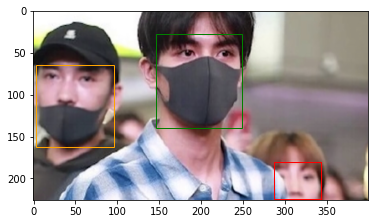

In [ ]:
bbox = generate_target(annot_list[232])
plot_image(img_list[232], bbox)

We can visualize the bounding box of the image through the `plot_image` function. The `generate_target` function saves the bounding box information corresponding to the maksssksksss307.png file in the `bbox` . Then the visulization is created by passing the image file and bounding box information to the `plot_image` function. The numbers in `img_list[]` and `annot_list[]` refer to the index of the maksssksksss307.png file, so they contain the same number.

In this chapter, we explored the dataset and examined how to create a bounding box. In the next chapter, we will complete data preprocessing to train the dataset.